In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [132]:
sim_df = pd.read_parquet('simulation_data.parquet')
rl_df = pd.read_parquet('agent_data.parquet')
rl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105120 entries, 0 to 105119
Data columns (total 33 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   day                                     105120 non-null  int64  
 1   time                                    105120 non-null  float64
 2   cooling_setpoint                        105120 non-null  float32
 3   Humidity_setpoint                       105120 non-null  float32
 4   AHU_Supply_Temp                         105120 non-null  float32
 5   Facility_Total_Electricity_Demand_Rate  105120 non-null  float64
 6   Temp_Z_1                                105120 non-null  float64
 7   Temp_Z_2                                105120 non-null  float64
 8   Temp_Z_3                                105120 non-null  float64
 9   Temp_Z_4                                105120 non-null  float64
 10  Temp_Z_5                                1051

In [133]:
zones_temp_cols = [x for x in df.columns if 'Temp_Z' in x]
rl_df[zones_temp_cols].describe()

,Temp_Z_1,Temp_Z_2,Temp_Z_3,Temp_Z_4,Temp_Z_5,Temp_Z_6,Temp_Z_7,Temp_Z_8,Temp_Z_9,Temp_Z_10,Temp_Z_11
count,105120.000000,105120.000000,105120.000000,105120.000000,105120.000000,105120.000000,105120.000000,105120.000000,105120.000000,105120.000000,105120.000000
mean,25.234836,18.165356,22.814026,18.166290,22.814461,18.166223,22.813365,18.164058,21.664761,18.162760,25.232626
std,1.996432,1.994271,2.000151,1.995032,2.000598,1.995090,2.001188,1.996148,1.999171,1.995804,1.997718
min,21.847092,14.999991,19.501440,14.999992,19.501439,14.999992,19.501438,14.999992,18.390411,14.999991,21.847041
25%,23.903173,16.906747,21.518296,16.915160,21.521817,16.915484,21.520051,16.911370,20.377212,16.901760,23.898679
50%,24.716010,17.583302,22.261690,17.583213,22.262350,17.582449,22.261327,17.581534,21.104424,17.581308,24.713753
75%,27.465171,20.494472,25.099619,20.496568,25.099738,20.496521,25.099712,20.496474,23.969632,20.495061,27.466169
max,29.881461,22.695703,27.398137,22.695819,27.398145,22.695819,27.398148,22.695875,26.238068,22.695759,29.867629


In [134]:
zones_temp_cols = [x for x in df.columns if 'Temp_Z' in x]
sim_df[zones_temp_cols].describe()

,Temp_Z_1,Temp_Z_2,Temp_Z_3,Temp_Z_4,Temp_Z_5,Temp_Z_6,Temp_Z_7,Temp_Z_8,Temp_Z_9,Temp_Z_10,Temp_Z_11
count,105120.000000,105120.000000,105120.000000,105120.000000,105120.000000,105120.000000,105120.000000,105120.000000,105120.000000,105120.000000,105120.000000
mean,25.076665,17.989044,22.646724,17.990088,22.647257,17.990125,22.646932,17.989430,21.497122,17.988167,25.076111
std,1.758732,1.716731,1.743134,1.718492,1.744040,1.718539,1.743556,1.717502,1.735523,1.715435,1.757652
min,23.083419,16.844608,20.878890,17.017900,20.962231,17.022742,21.008888,17.119352,19.869259,16.921567,23.151137
25%,24.323330,17.294999,21.917120,17.294999,21.917120,17.294999,21.917102,17.294999,20.776765,17.294999,24.323354
50%,24.391721,17.295001,21.957771,17.295001,21.957741,17.295001,21.957715,17.295001,20.807592,17.295001,24.391718
75%,24.503148,17.295458,22.026295,17.295346,22.026194,17.295345,22.026062,17.295161,20.859796,17.295221,24.503509
max,33.939546,26.673919,31.443162,26.678065,31.445201,26.678064,31.443465,26.674567,30.262859,26.667106,33.915771


In [139]:
np.mean(rl_df['cooling_setpoint'])

17.126595

In [135]:
r = sum(rl_df['Facility_Total_Electricity_Demand_Rate'])
r

76989454895.95451

In [136]:
c = sum(sim_df['Facility_Total_Electricity_Demand_Rate'])
c

85789967249.54861

In [137]:
(c - r) / c

0.10258206915961265

In [126]:
zones_rh_cols = [x for x in rl_df.columns if 'RH' in x]
rl_df[zones_rh_cols].describe()

,RH_Z_1,RH_Z_5,RH_Z_6,RH_Z_7,RH_Z_11
count,105120.000000,105120.000000,105120.000000,105120.000000,105120.000000
mean,22.577116,26.123701,34.812026,26.125323,22.579699
std,9.582108,11.117416,14.841911,11.117922,9.582363
min,6.498879,7.479325,9.916970,7.479105,6.498658
25%,13.207961,15.286492,20.393298,15.287478,13.211698
50%,24.538174,28.309090,37.489223,28.308620,24.540163
75%,31.184356,36.099995,48.069989,36.102408,31.193075
max,42.186001,49.271717,66.159438,49.277270,42.156516


In [127]:
np.mean(rl_df['AHU_Supply_Temp'])

10.782067

In [128]:
rl_df['RH_Z_6'].describe()

count    105120.000000
mean         34.812026
std          14.841911
min           9.916970
25%          20.393298
50%          37.489223
75%          48.069989
max          66.159438
Name: RH_Z_6, dtype: float64

In [50]:
# Data from RL-agent Learning
learning_data = [
-317502711.3532
,-336540274.4992
,-355034443.5474
,-335589313.0563
,-316763964.7588
,-275975086.519
,-295820897.3379
,-265913387.9444
,-261949868.2054
,-261422011.8723
,-247353538.7067
,-255494223.747
,-255795167.73
,-231093096.2298
,-226432534.1951
,-220633594.1325
,-204907307.7181
,-201249632.0719
,-182145929.7435
,-174674971.4474
,-173902687.3319
,-163066757.0866
,-150678778.0812
,-137567734.4131
,-136903187.6788
,-129247965.7118
,-123722970.8083
,-114123279.9155
,-114462279.6837
,-120517172.0851
,-109522885.5488
,-88004257.0586
,-86729909.1
,-88841663.9417
,-81177872.3941
,-69485464.5843
,-64498336.5866
,-65548561.2827
,-66213342.7303
,-63897080.3714
,-62820808.2073
,-60137885.0387
,-56293770.2465
,-54925001.5947
,-53987610.2861
,-55396541.3027
,-55999792.3806
,-53777092.1484
,-50535373.6004
,-52001959.8434
,-55818159.8288
,-54383269.6424
,-48669895.2701
,-45946077.6377
,-43468156.6198
,-45022166.5959
,-43125600.4991
,-43790165.9569
,-42801836.7583
,-42069693.0777
,-40983307.1349
,-41495220.3379
,-39381017.7634
,-34860980.4506
,-35624635.598
,-32681312.0149
,-35472983.4005
,-34723470.784
,-33859294.0234
,-33498737.4436
,-32590776.2231
]

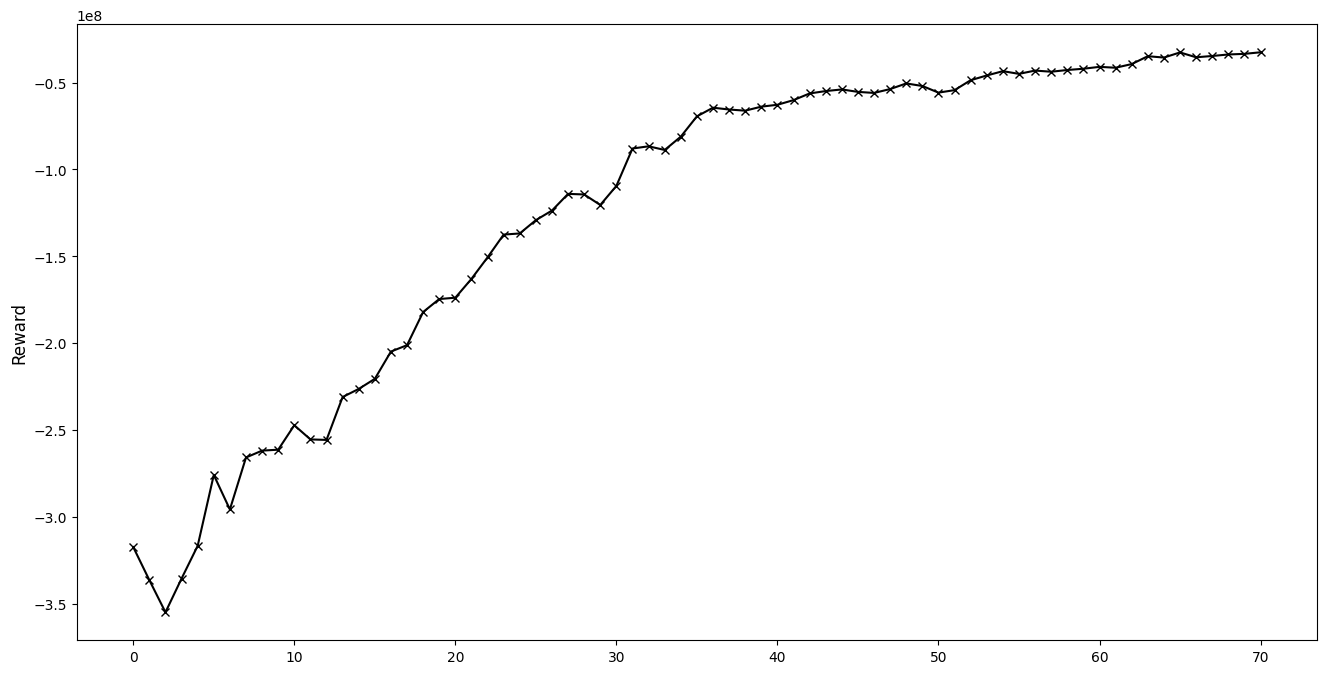

In [52]:
plt.figure(figsize=(16,8))
plt.plot(learning_data, 'kx-')
plt.ylabel('Reward', fontsize=12)
plt.savefig("Agent_Learn.png", format='png', bbox_inches='tight')